## Librarys Used In Report 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
import pylab
from scipy.stats import skew
import math
%matplotlib inline  
import warnings
warnings.filterwarnings('ignore')

## Lodaing of Churn Dataset

In [3]:
df = pd.read_csv('churn.txt')
df.columns = ['State', 'Account_Length', 'Area_Code', 'Phone', 'Intl_Plan',
       'VMail_Plan', 'VMail_Message', 'Day_Mins', 'Day_Calls', 'Day_Charge',
       'Eve_Mins', 'Eve_Calls', 'Eve_Charge', 'Night_Mins', 'Night_Calls',
       'Night_Charge', 'Intl_Mins', 'Intl_Calls', 'Intl_Charge',
       'CustServ_Calls', 'Churn?']
df.head()

,State,Account_Length,Area_Code,Phone,Intl_Plan,VMail_Plan,VMail_Message,Day_Mins,Day_Calls,Day_Charge,...,Eve_Calls,Eve_Charge,Night_Mins,Night_Calls,Night_Charge,Intl_Mins,Intl_Calls,Intl_Charge,CustServ_Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


## Sum of NA's in Each Column

There is no NA's in any of the columns. That means there is no need to use any of the methods to handle NA's.

In [4]:
## Check NA's
df.isnull().sum()

State             0
Account_Length    0
Area_Code         0
Phone             0
Intl_Plan         0
VMail_Plan        0
VMail_Message     0
Day_Mins          0
Day_Calls         0
Day_Charge        0
Eve_Mins          0
Eve_Calls         0
Eve_Charge        0
Night_Mins        0
Night_Calls       0
Night_Charge      0
Intl_Mins         0
Intl_Calls        0
Intl_Charge       0
CustServ_Calls    0
Churn?            0
dtype: int64

## Spliting Data

At this point the data was split into two datasets. One of all the categorical and one of all the numeric variables. This was done to make it easier for exploratory data analysis.

In [5]:
### Numeric Split
number = df[['Account_Length', 'VMail_Message', 'Day_Mins', 'Day_Calls',
       'Day_Charge', 'Eve_Mins', 'Eve_Calls', 'Eve_Charge', 'Night_Mins',
       'Night_Calls', 'Night_Charge', 'Intl_Mins', 'Intl_Calls', 'Intl_Charge',
       'CustServ_Calls']]
number.head()

,Account_Length,VMail_Message,Day_Mins,Day_Calls,Day_Charge,Eve_Mins,Eve_Calls,Eve_Charge,Night_Mins,Night_Calls,Night_Charge,Intl_Mins,Intl_Calls,Intl_Charge,CustServ_Calls
0,128,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,107,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,137,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,84,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,75,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3


In [6]:
### Categorical Split
factor = df[['State','Area_Code', 'Phone', 'VMail_Plan','Intl_Plan', 'Churn?']]
factor.head()

,State,Area_Code,Phone,VMail_Plan,Intl_Plan,Churn?
0,KS,415,382-4657,yes,no,False.
1,OH,415,371-7191,yes,no,False.
2,NJ,415,358-1921,no,no,False.
3,OH,408,375-9999,no,yes,False.
4,OK,415,330-6626,no,yes,False.


# Numeric Variables 

## Summary Statistics of Numeric Variables Only

Summary statistics were created with only the numeric variables to see the distribution of data and view the data at a deeper level. A calculation of the skewness was done which showed that Vmail.Message , Intl.Calls, and CustServ.Calls are skewed extremely positively. Some type of transformation should be done to have the distribution of the data be closer to normal. Outside of these values the rest of the variables are close to  a normal distribution.

In [7]:
### Summary Statistics
number.describe().round(3)

,Account_Length,VMail_Message,Day_Mins,Day_Calls,Day_Charge,Eve_Mins,Eve_Calls,Eve_Charge,Night_Mins,Night_Calls,Night_Charge,Intl_Mins,Intl_Calls,Intl_Charge,CustServ_Calls
count,3333.000,3333.000,3333.000,3333.000,3333.000,3333.000,3333.000,3333.000,3333.000,3333.000,3333.000,3333.000,3333.000,3333.000,3333.000
mean,101.065,8.099,179.775,100.436,30.562,200.980,100.114,17.084,200.872,100.108,9.039,10.237,4.479,2.765,1.563
std,39.822,13.688,54.467,20.069,9.259,50.714,19.923,4.311,50.574,19.569,2.276,2.792,2.461,0.754,1.315
min,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,23.200,33.000,1.040,0.000,0.000,0.000,0.000
25%,74.000,0.000,143.700,87.000,24.430,166.600,87.000,14.160,167.000,87.000,7.520,8.500,3.000,2.300,1.000
50%,101.000,0.000,179.400,101.000,30.500,201.400,100.000,17.120,201.200,100.000,9.050,10.300,4.000,2.780,1.000
75%,127.000,20.000,216.400,114.000,36.790,235.300,114.000,20.000,235.300,113.000,10.590,12.100,6.000,3.270,2.000
max,243.000,51.000,350.800,165.000,59.640,363.700,170.000,30.910,395.000,175.000,17.770,20.000,20.000,5.400,9.000


In [8]:
### Skewness 
number[['Account_Length', 'VMail_Message', 'Day_Mins', 'Day_Calls',
       'Day_Charge', 'Eve_Mins', 'Eve_Calls', 'Eve_Charge', 'Night_Mins',
       'Night_Calls', 'Night_Charge', 'Intl_Mins', 'Intl_Calls', 'Intl_Charge',
       'CustServ_Calls']].skew()

Account_Length    0.096606
VMail_Message     1.264824
Day_Mins         -0.029077
Day_Calls        -0.111787
Day_Charge       -0.029083
Eve_Mins         -0.023877
Eve_Calls        -0.055563
Eve_Charge       -0.023858
Night_Mins        0.008921
Night_Calls       0.032500
Night_Charge      0.008886
Intl_Mins        -0.245136
Intl_Calls        1.321478
Intl_Charge      -0.245287
CustServ_Calls    1.091359
dtype: float64

## Function Used to View Distribution and Outliers

A function was created to view all the outliers using the IQR method. The function also produced the skewness of the data again.  The function created three plots to view the data. A histogram was created to see the distribution of the data and has vertical lines that point to the range of the IQR. Also, a boxplot was created to view the outliers. Any point that is not in the boxplot is a outlier. Finally, a Q-Q plot was created to see if the data is normally distributed. If the data isn’t normally distributed than a transformation has to happen.

In [9]:
### distribution and outlier function
def outlier_fun(x):
    i = x

    q1,q3 = np.percentile(number[[i]], [25,75])
    iqr = q3 - q1
    max = q3 + (iqr * 1.5)
    min = q1 - (iqr * 1.5)
    df8 = number[[i]]
    print('Outliers')
    print(df8[(df8[i]> max) | (df8[i] < min)])
    print('-' * 100)
    
    print('Skew:',skew(number[i]))
    
    


    plt.figure(figsize=(10,8))
    plt.subplot(211)
    plt.hist(number[i], bins = 30)
    plt.xlim(df[i].min(), df[i].max()*1.1)
    plt.title(i + ' Histogram')
    plt.axvline(x=min)
    plt.axvline(x=max)

    ax = df[i].plot(kind='kde')

    plt.subplot(212)
    plt.xlim(df[i].min(), df[i].max()*1.1)
    sns.boxplot(x=df[i])
    plt.title(i + ' Boxplot')

   
    plt.subplot(212)
    sm.qqplot(number[i], line='q')
    plt.title(i + ' qqplot')
    pylab.show()

### Account Length

For Account Length the skewness is 0.09 and the histogram has a normal distribution to the data. The points in the QQ-plot are very close to the line which points to the distribution being normal for Account Length. No transformation needed. Based on the IQR method and the boxplot there are some outliers that need to be tended to. One could drop the outliers, assign a new value, or try a transformation.

Outliers
      Account_Length
197              208
238              215
309              209
416              224
817              243
1045             217
1093             210
1387             212
1408             232
1551             225
1751             225
1886             224
2150             212
2259             210
2277             217
2700             209
3216             221
3227             209
----------------------------------------------------------------------------------------------------
Skew: 0.09656281161489656


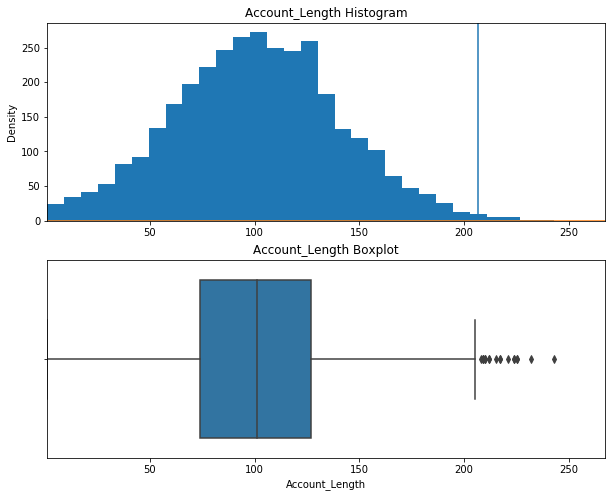

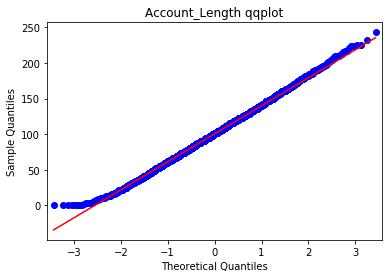

In [10]:
outlier_fun('Account_Length')

### VMail_Message

For Vmail_Message the skewness is 1.26 and the histogram is extremely positively skewed. The points in the QQ-plot are not close to the line which points to the distribution not being normal.  Based on these three points of information the data for Vmail_Message  is not normally distributed and needs a transformation. Based on the IQR method and the boxplot there are some outliers that need to be tended to. One could drop the outliers, assign a new value, or try a transformation.

Outliers
     VMail_Message
845             51
----------------------------------------------------------------------------------------------------
Skew: 1.2642543349768245


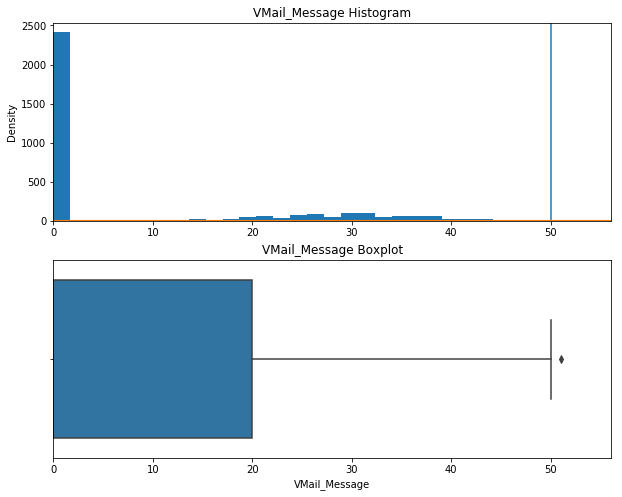

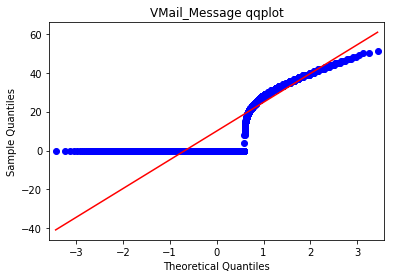

In [11]:
outlier_fun('VMail_Message')

### Transformation of Vmail_Message 

The data for Vmail.Message is extremely positively skewed, which leads to performing a transformation on the data.  Since there are many zeros in Vmail.Message, log and inverse square root will not work without changing the values of the zeros. Not wanting to change the values of the zeros at this time using the square root will be the best option. The skewness went from 1.26 to 1.07, which is closer to normal but not as close to zero as one would like. When looking at the histogram and Q-Q plot from the transformed data there isn’t much difference from the original plots.The distribution is closer to normal but not as much as one would like it to be after a transformation. 

Raw Data Skew:  1.2642543349768245
Transformation Skew:  1.076423849173386
----------------------------------------------------------------------------------------------------


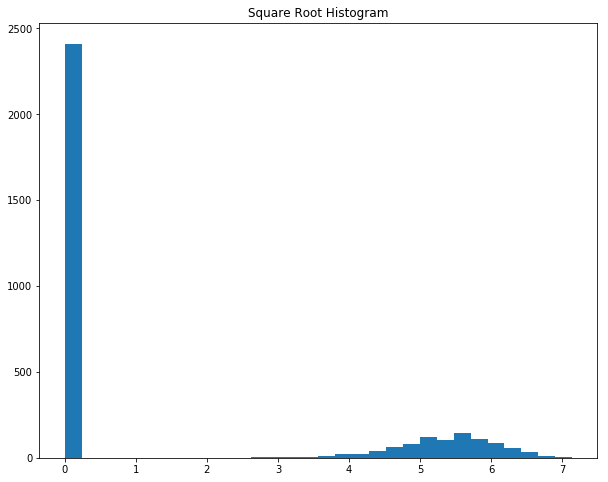

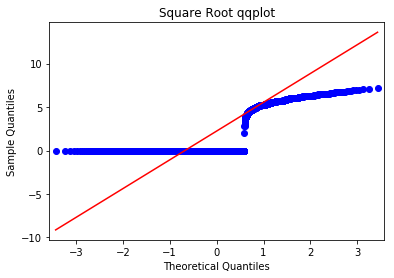

In [12]:
sq_vm = np.sqrt(number['VMail_Message'])
print('Raw Data Skew: ', skew(number['VMail_Message']))
print('Transformation Skew: ', skew(sq_vm))
print('-' * 100)

plt.figure(figsize=(10,8))
plt.hist(sq_vm, bins = 30)
plt.title('Square Root Histogram')

sm.qqplot(sq_vm, line='q')
plt.title('Square Root qqplot')
pylab.show()

### Day_Mins

For Day_Mins the skewness is -0.03 and the histogram has a normal distribution. The points in the QQ-plot are very close to the line which points to the distribution being normal. No transformation needed. Based on the IQR method and the boxplot there are some outliers that need to be tended to. One could drop the outliers, assign a new value, or try a transformation.

Outliers
      Day_Mins
15       332.9
156      337.4
197      326.5
365      350.8
605      335.5
685       30.9
741       34.0
975      334.3
985      346.8
1052      12.5
1076      25.9
1345       0.0
1397       0.0
1621      19.5
1679     329.8
1986       7.9
2028     328.1
2124      27.0
2252      17.6
2412     326.3
2594     345.3
2736       2.6
2753       7.8
3046      18.9
3174      29.9
----------------------------------------------------------------------------------------------------
Skew: -0.029063979518119797


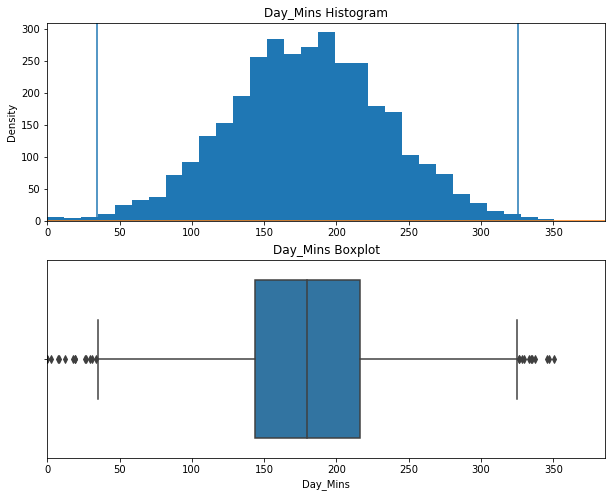

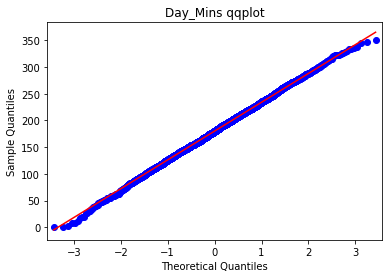

In [13]:
outlier_fun('Day_Mins')

### Day_Calls

For Day_Calls the skewness is -0.11 and the histogram has a normal distribution. The points in the QQ-plot are very close to the line tailing off a little at the end but not affecting the distribution that much, which points to being normal. No transformation needed. Based on the IQR method and the boxplot there are some outliers that need to be tended to. One could drop the outliers, assign a new value, or try a transformation.

Outliers
      Day_Calls
315         158
468         163
692          36
740          40
1057        158
1121        165
1144         30
1322         42
1345          0
1346         45
1397          0
1422         45
1460        160
1869        156
1989         35
2217         42
2392        158
2394        157
2492         45
2884         44
2885         44
2964         44
3187         40
----------------------------------------------------------------------------------------------------
Skew: -0.11173632373075189


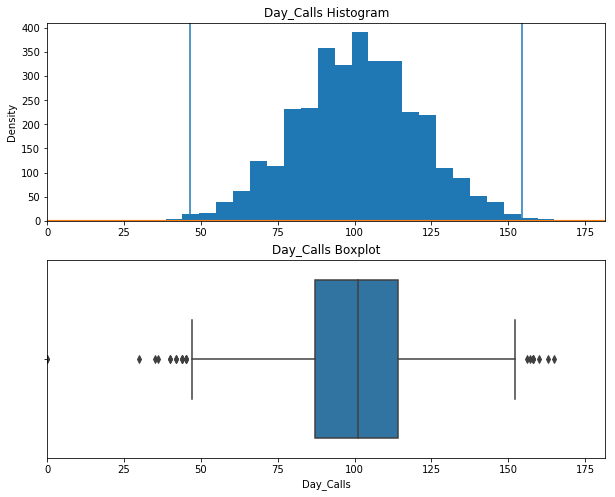

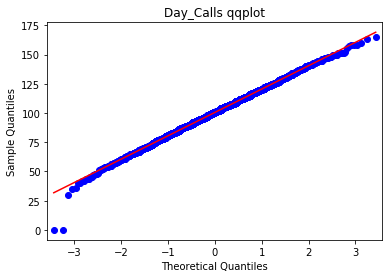

In [14]:
outlier_fun('Day_Calls')

### Day_Charge

For Day_Charge  the skewness is -0.03 and the histogram has a normal distribution to the data. The points in the QQ-plot are very close to the line which points to the distribution being normal. No transformation needed. Based on the IQR method and the boxplot there are some outliers that need to be tended to. One could drop the outliers, assign a new value, or try a transformation.

Outliers
      Day_Charge
15         56.59
156        57.36
197        55.51
365        59.64
605        57.04
685         5.25
741         5.78
975        56.83
985        58.96
1052        2.13
1076        4.40
1345        0.00
1397        0.00
1621        3.32
1679       56.07
1986        1.34
2028       55.78
2124        4.59
2252        2.99
2412       55.47
2594       58.70
2736        0.44
2753        1.33
3046        3.21
3174        5.08
----------------------------------------------------------------------------------------------------
Skew: -0.02907017792703775


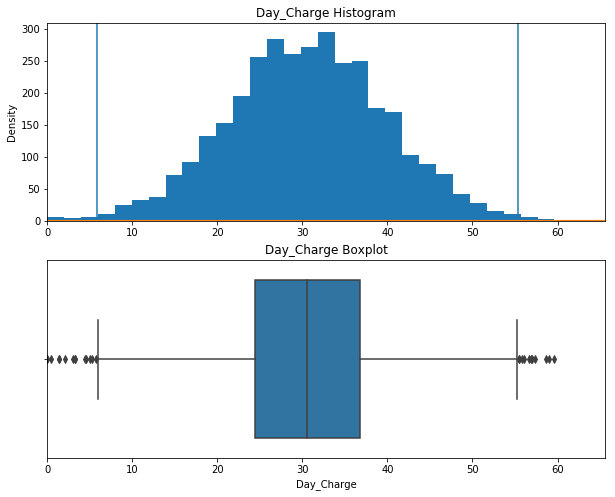

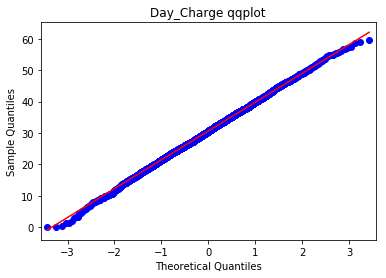

In [15]:
outlier_fun('Day_Charge')

### Eve_Mins

For Eve_Mins the skewness is -0.02 and the histogram has a normal distribution to the data. The points in the QQ-plot are very close to the line which points to the distribution being normal. No transformation needed. Based on the IQR method and the boxplot there are some outliers that need to be tended to. One could drop the outliers, assign a new value, or try a transformation.

Outliers
      Eve_Mins
3         61.9
6        348.5
8        351.6
32        31.2
302      350.5
533       42.2
580      347.3
587       58.9
821       43.9
850       52.9
889       42.5
893       60.8
1054      58.6
1190      56.0
1233      48.1
1335      60.0
1601     350.9
1960      49.2
2160     339.9
2331     361.8
2551     354.2
2732     363.7
2932       0.0
3075     341.3
----------------------------------------------------------------------------------------------------
Skew: -0.023866708804637538


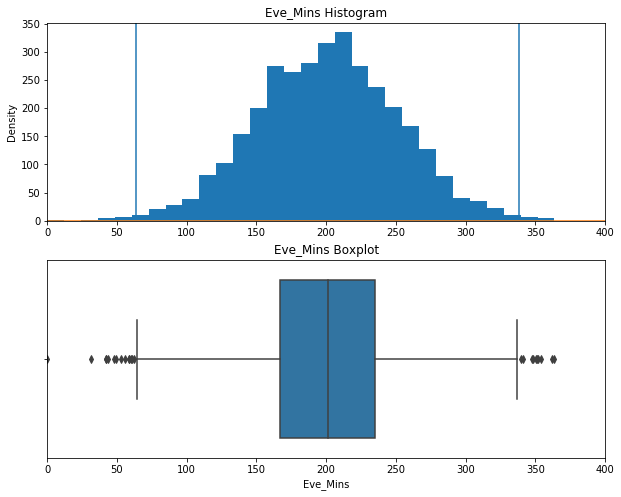

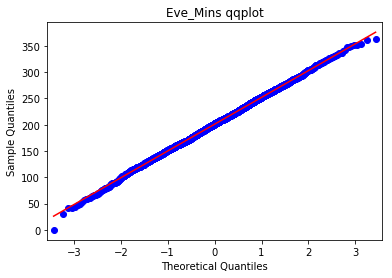

In [16]:
outlier_fun('Eve_Mins')

### Eve_Calls 

For Eve_Calls the skewness is -0.05 and the histogram has a normal distribution to the data. The points in the QQ-plot are very close to the line  with a little tail off at the end, but still the plot points to the distribution being normal. No transformation needed. Based on the IQR method and the boxplot there are some outliers that need to be tended to. One could drop the outliers, assign a new value, or try a transformation.

Outliers
      Eve_Calls
58          164
154          46
301         168
475          42
646          37
960          12
1020        157
1071        155
1266         45
1615         36
1706        156
1730         46
1856         44
2227        155
2592         46
2853         43
2932          0
3121        155
3157        159
3219        170
----------------------------------------------------------------------------------------------------
Skew: -0.05553813000161922


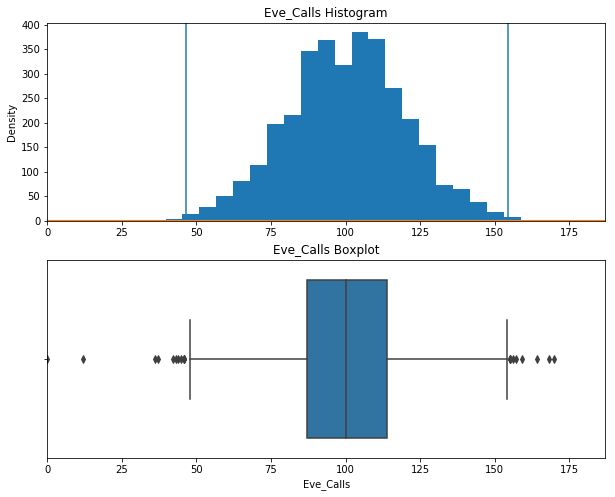

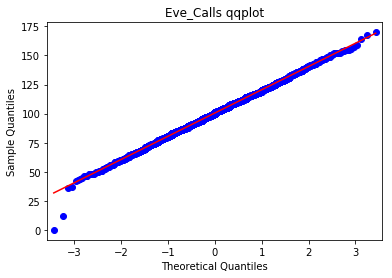

In [17]:
outlier_fun('Eve_Calls')

### Eve_Charge

For Eve_Charge the skewness is -0.02 and the histogram has a normal distribution to the data. The points in the QQ-plot are very close to the line with a little tail off at the end, but still the plot points to the distribution being normal. No transformation needed. Based on the IQR method and the boxplot there are some outliers that need to be tended to. One could drop the outliers, assign a new value, or try a transformation.

Outliers
      Eve_Charge
3           5.26
6          29.62
8          29.89
32          2.65
302        29.79
533         3.59
580        29.52
587         5.01
821         3.73
850         4.50
889         3.61
893         5.17
1054        4.98
1190        4.76
1233        4.09
1335        5.10
1601       29.83
1960        4.18
2160       28.89
2331       30.75
2551       30.11
2732       30.91
2932        0.00
3075       29.01
----------------------------------------------------------------------------------------------------
Skew: -0.023847250496276968


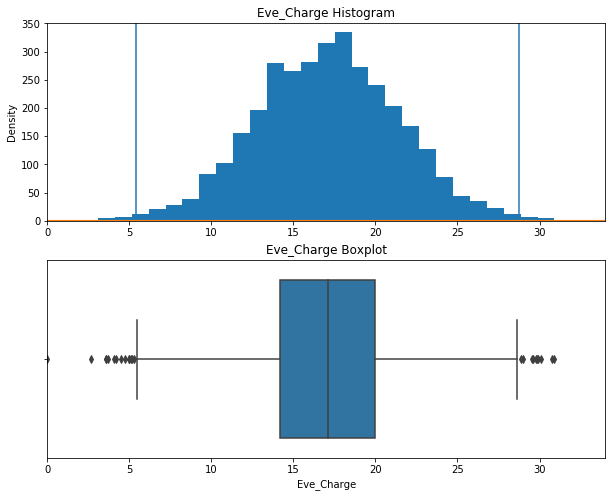

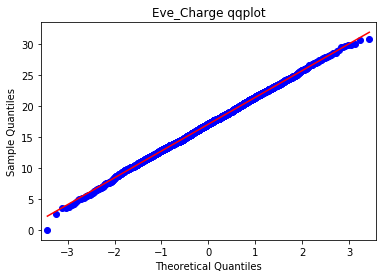

In [18]:
outlier_fun('Eve_Charge')

### Night_Mins

For Night_Mins the skewness is 0.008 and the histogram has a normal distribution to the data. The points in the QQ-plot are very close to the line with a little tail off at the top of the plot, but still the plot points to the distribution being normal. No transformation needed. Based on the IQR method and the boxplot there are some outliers that need to be tended to. One could drop the outliers, assign a new value, or try a transformation.

Outliers
      Night_Mins
116         57.5
244        354.9
444        349.2
862        345.8
883         45.0
918        342.8
922        364.3
992         63.3
999         54.5
1072        50.1
1113        43.7
1202       349.7
1238       352.5
1260        23.2
1313        63.6
1317       381.9
1445       377.5
2321       367.7
2350        56.6
2382        54.0
2452        64.2
2609       344.3
2663       395.0
2754       350.2
2756        50.1
3024        53.3
3060       352.2
3107       364.9
3159        61.4
3247        47.4
----------------------------------------------------------------------------------------------------
Skew: 0.008917275580987895


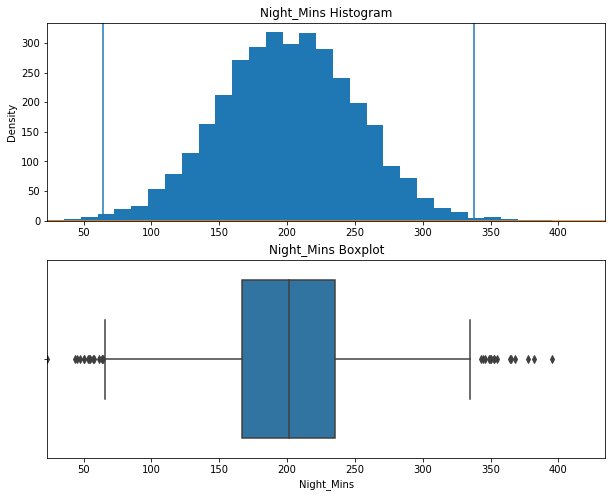

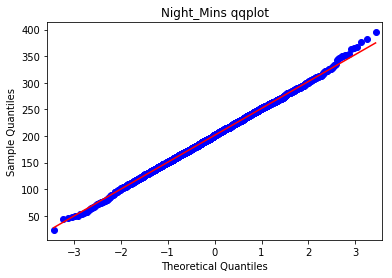

In [19]:
outlier_fun('Night_Mins')

### Night_Calls

For Night_Calls the skewness is 0.03 and the histogram has a normal distribution to the data. The points in the QQ-plot are very close to the line, which points to the distribution being normal. No transformation needed. Based on the IQR method and the boxplot there are some outliers that need to be tended to. One could drop the outliers, assign a new value, or try a transformation.

Outliers
      Night_Calls
315            46
326            42
335            44
395            42
429           153
493           175
586           154
901           158
1109          155
1200          157
1296          157
1748          154
1810          153
2288          166
2659           33
2728          155
2736          156
2903           38
2988           36
3172          156
3211          164
3234          153
----------------------------------------------------------------------------------------------------
Skew: 0.03248494205404463


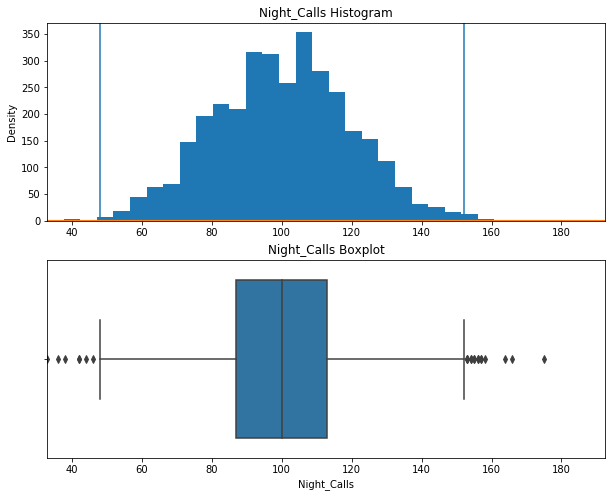

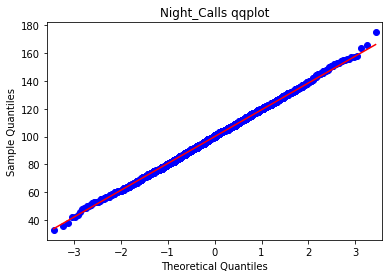

In [20]:
outlier_fun('Night_Calls')

### Night_Charge

For Night_Charge the skewness is 0.009 and the histogram has a normal distribution to the data. The points in the QQ-plot are very close to the line, which points to the distribution being normal. No transformation needed. Based on the IQR method and the boxplot there are some outliers that need to be tended to. One could drop the outliers, assign a new value, or try a transformation.

Outliers
      Night_Charge
116           2.59
244          15.97
444          15.71
862          15.56
883           2.03
918          15.43
922          16.39
992           2.85
999           2.45
1072          2.25
1113          1.97
1202         15.74
1238         15.86
1260          1.04
1313          2.86
1317         17.19
1445         16.99
2321         16.55
2350          2.55
2382          2.43
2452          2.89
2609         15.49
2663         17.77
2754         15.76
2756          2.25
3024          2.40
3060         15.85
3107         16.42
3159          2.76
3247          2.13
----------------------------------------------------------------------------------------------------
Skew: 0.008882237062694412


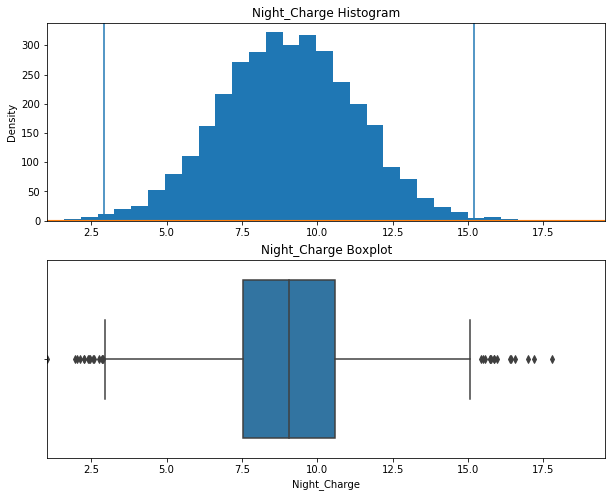

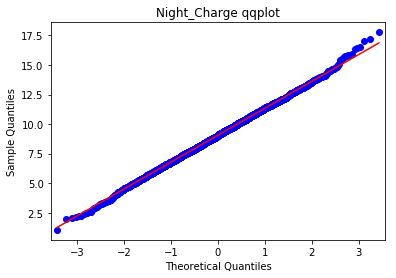

In [21]:
outlier_fun('Night_Charge')

### Intl_Mins

For Intl_Mins the skewness is -0.25 and the histogram has a normal distribution to the data. The points in the QQ-plot are very close to the line tailing off at the end, but even with the tail the plot points to the distribution being normal. No transformation needed. Based on the IQR method and the boxplot there are some outliers that need to be tended to. One could drop the outliers, assign a new value, or try a transformation.

Outliers
      Intl_Mins
115        20.0
179         0.0
214        17.6
225         2.7
314        18.9
343         0.0
367        18.0
397         2.0
488         0.0
535        18.2
595         0.0
712         0.0
762         1.3
878         0.0
1028        0.0
1080        0.0
1099        2.2
1257       18.0
1400        0.0
1420       17.9
1564        0.0
1816       18.4
1966        2.0
2004       17.8
2180        2.9
2197        3.1
2229       17.6
2256        2.6
2345        0.0
2362        0.0
2371       18.2
2513        0.0
2534       18.0
2669        1.1
2733        0.0
2816       18.3
2906        0.0
2918        0.0
2933        2.1
3022        2.9
3160        2.1
3216        2.4
3234        2.5
3275        0.0
3290        0.0
3307       17.8
----------------------------------------------------------------------------------------------------
Skew: -0.24502560348664432


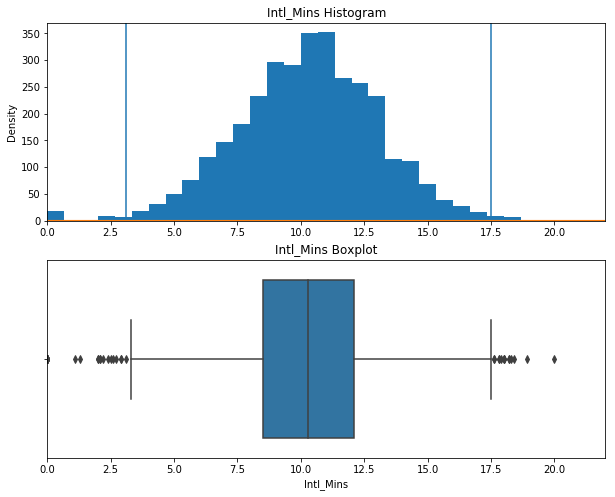

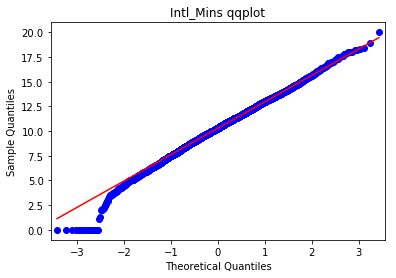

In [22]:
outlier_fun('Intl_Mins')

### Intl_Calls

For Intl_Calls the skewness is 1.32 and the histogram is extremely positively skewed. The points in the QQ-plot are not close to the line which points to the distribution not being normal.  Based on these three points of information the data for Intl_Calls is not normally distributed and needs a transformation. Based on the IQR method and the boxplot there are some outliers that need to be tended to. One could drop the outliers, assign a new value, or try a transformation.

Outliers
      Intl_Calls
22            19
41            15
153           11
182           12
185           13
211           11
219           12
250           11
272           13
329           12
341           11
347           11
377           18
420           11
474           12
483           13
504           12
514           12
588           11
636           15
642           13
674           15
698           11
723           11
756           14
837           13
842           11
854           13
863           13
883           12
...          ...
1832          11
1889          15
1960          11
2001          14
2018          11
2156          11
2212          12
2269          13
2562          11
2576          11
2621          16
2703          13
2724          11
2775          13
2826          11
2835          15
2883          11
2930          12
2947          13
2956          18
2970          12
3025          12
3071          12
3097          11
3109          13
3128          11
3206 

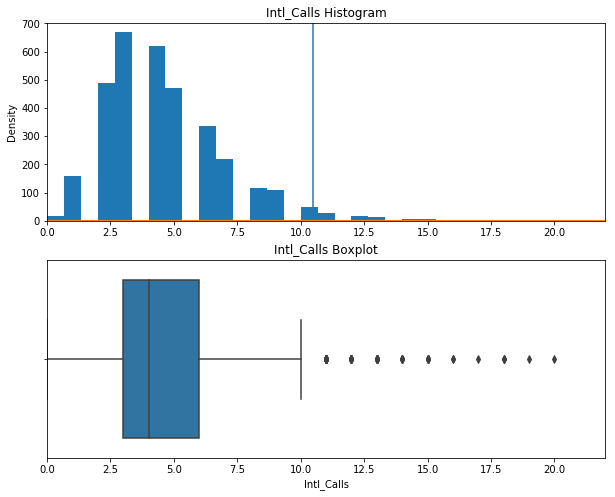

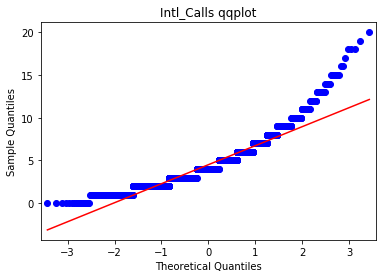

In [23]:
outlier_fun('Intl_Calls')

### Transformation of Intl_Calls

The data for Intl_Calls is extremely positively skewed, which leads to performing a transformation on the data.  Since there are many zeros in Intl.Plan, log and inverse square root will not work without changing the values of the zeros. Not wanting to change the values of the zeros at this time using the square root will be the best option. The skewness went from 1.32 to 0.23, which is closer to normal than the data was before the transformation. Looking at the histogram and Q-Q plot there is a difference from the original plots. For the histogram the data has more of a normal distribution than the original histogram. The Q-Q plot also shows that the data is closer to normal than the original Q-Q plot. The red points are now closer to the line, which points to being closer to the ideal normal distribution.

Raw Data Skew:  1.3208833668164015
Transformation Skew:  0.23244708127175245
----------------------------------------------------------------------------------------------------


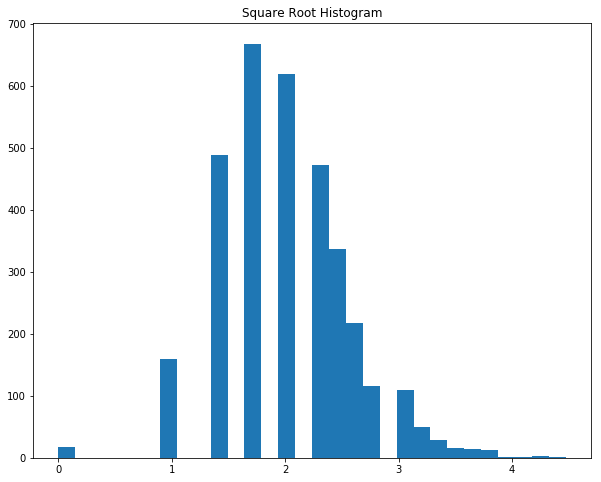

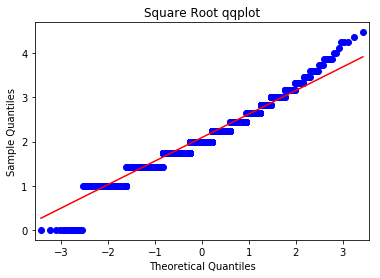

In [24]:
sq_ic = np.sqrt(number['Intl_Calls'])
print('Raw Data Skew: ', skew(number['Intl_Calls']))
print('Transformation Skew: ', skew(sq_ic))
print('-' * 100)


plt.figure(figsize=(10,8))
plt.hist(sq_ic, bins = 30)
plt.title('Square Root Histogram')

sm.qqplot(sq_ic, line='q')
plt.title('Square Root qqplot')
pylab.show()

### Intl_Charge

For Intl_Charge the skewness is -0.25 and the histogram has a normal distribution to the data. The points in the QQ-plot are very close to the line tailing off at the end, but even with the tail the plot points to the distribution being normal. No transformation needed. Based on the IQR method and the boxplot there are some outliers that need to be tended to. One could drop the outliers, assign a new value, or try a transformation.

Outliers
      Intl_Charge
115          5.40
179          0.00
214          4.75
225          0.73
314          5.10
343          0.00
367          4.86
397          0.54
488          0.00
502          4.73
515          4.73
535          4.91
595          0.00
712          0.00
762          0.35
878          0.00
1028         0.00
1080         0.00
1099         0.59
1257         4.86
1400         0.00
1420         4.83
1564         0.00
1816         4.97
1966         0.54
2004         4.81
2180         0.78
2197         0.84
2229         4.75
2256         0.70
2345         0.00
2362         0.00
2371         4.91
2513         0.00
2534         4.86
2669         0.30
2733         0.00
2816         4.94
2906         0.00
2918         0.00
2933         0.57
3022         0.78
3080         4.73
3160         0.57
3216         0.65
3234         0.68
3275         0.00
3290         0.00
3307         4.81
-------------------------------------------------------------------------------------------

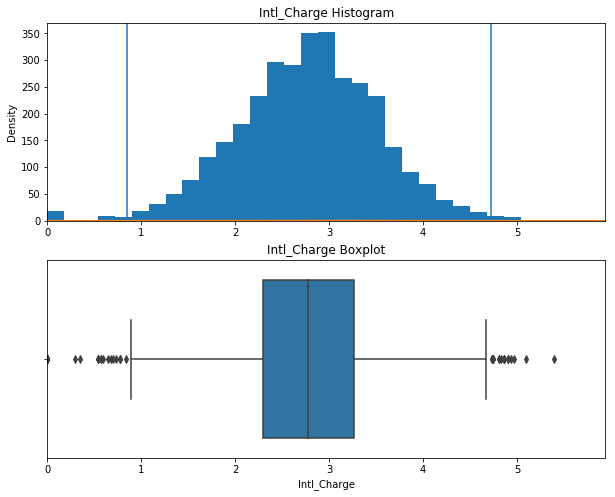

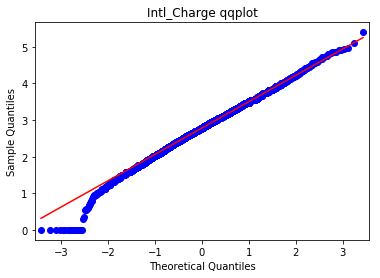

In [25]:
outlier_fun('Intl_Charge')

### CustServ_Calls

For CustServ_Calls the skewness is 1.09 and the histogram is extremely positively skewed. The points in the QQ-plot are not close to the line which points to the distribution not being normal.  Based on these three points of information the data for CustServ_Calls is not normally distributed and needs a transformation. Based on the IQR method and the boxplot there are some outliers that need to be tended to. One could drop the outliers, assign a new value, or try a transformation.

Outliers
      CustServ_Calls
10                 4
14                 4
15                 4
21                 5
48                 5
54                 5
69                 4
77                 4
86                 4
97                 4
100                4
105                4
112                4
126                4
127                4
133                4
136                5
154                5
180                4
181                5
198                4
228                4
235                5
248                4
250                4
251                4
255                4
266                4
293                5
298                4
...              ...
3026               6
3027               4
3035               4
3050               4
3064               4
3079               5
3081               6
3112               7
3115               4
3125               4
3127               4
3131               5
3140               5
3144               5
3147               4
3157

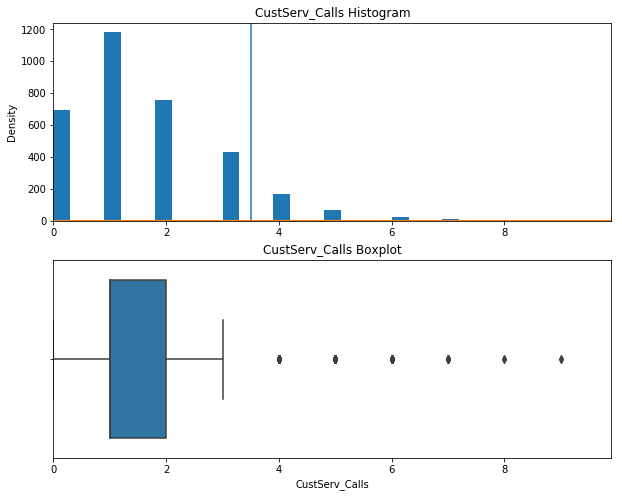

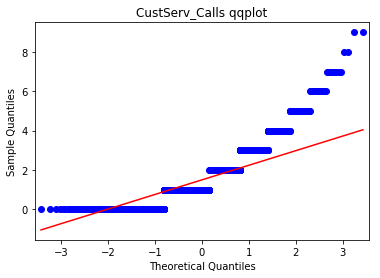

In [26]:
outlier_fun('CustServ_Calls') 

### Transformation of CustServ_Calls

 The data for CustServ.Calls is extremely positively skewed, which leads to performing a transformation on the data.  Since there are many zeros in CustServ_Calls, log and inverse square root will not work without changing the values of the zeros. Not wanting to change the values of the zeros at this time using the square root will be the best option. The skewness went from 1.09 to -.38, which is closer to normal than the data was before the transformation. Looking at the histogram and Q-Q plot there is a difference from the original plots. For the histogram the data has more of a normal distribution than the original histogram. The Q-Q plot also shows that the data is closer to normal than the original Q-Q plot, but not by much. The red points are slightly closer to the line, which points to being closer to the ideal normal distribution.

Raw Data Skew:  1.090868260175501
Transformation Skew:  -0.38037340033635264
----------------------------------------------------------------------------------------------------


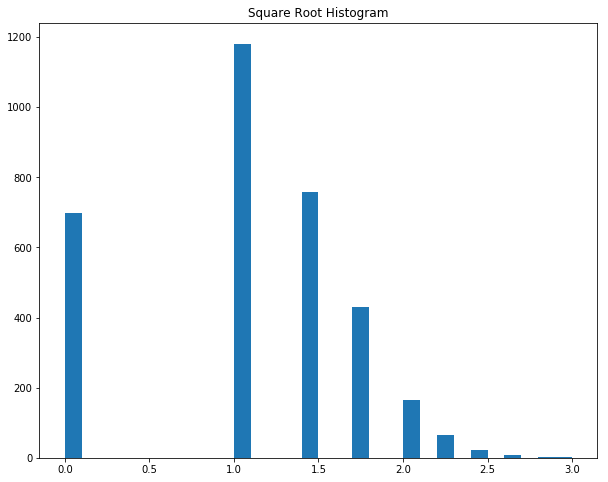

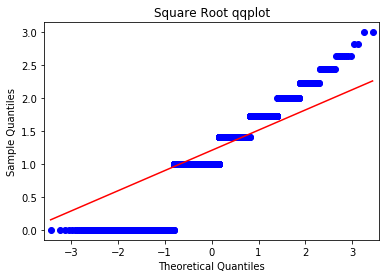

In [27]:
sq_csc = np.sqrt(number['CustServ_Calls'])
print('Raw Data Skew: ', skew(number['CustServ_Calls']))
print('Transformation Skew: ', skew(sq_csc))
print('-' * 100)


plt.figure(figsize=(10,8))
plt.hist(sq_csc, bins = 30)
plt.title('Square Root Histogram')

sm.qqplot(sq_csc, line='q')
plt.title('Square Root qqplot')
pylab.show()

### Correlation of Numeric Variables 

For the most part there isn’t much correlation between the numeric variables. The correlation is mostly around zero except for the Day.Mins and Day.Charge,  Eve.Mins and Eve.Charge, Night.Mins and Night.Charge, and Intl.Mins and Intl.Charge, which all have a correlation of one. As the number of minutes used rises the charge on the account gets bigger. This correlation makes complete sense. The next step would be to perform PCA on the correlated features or remove one of the correlated variables.  

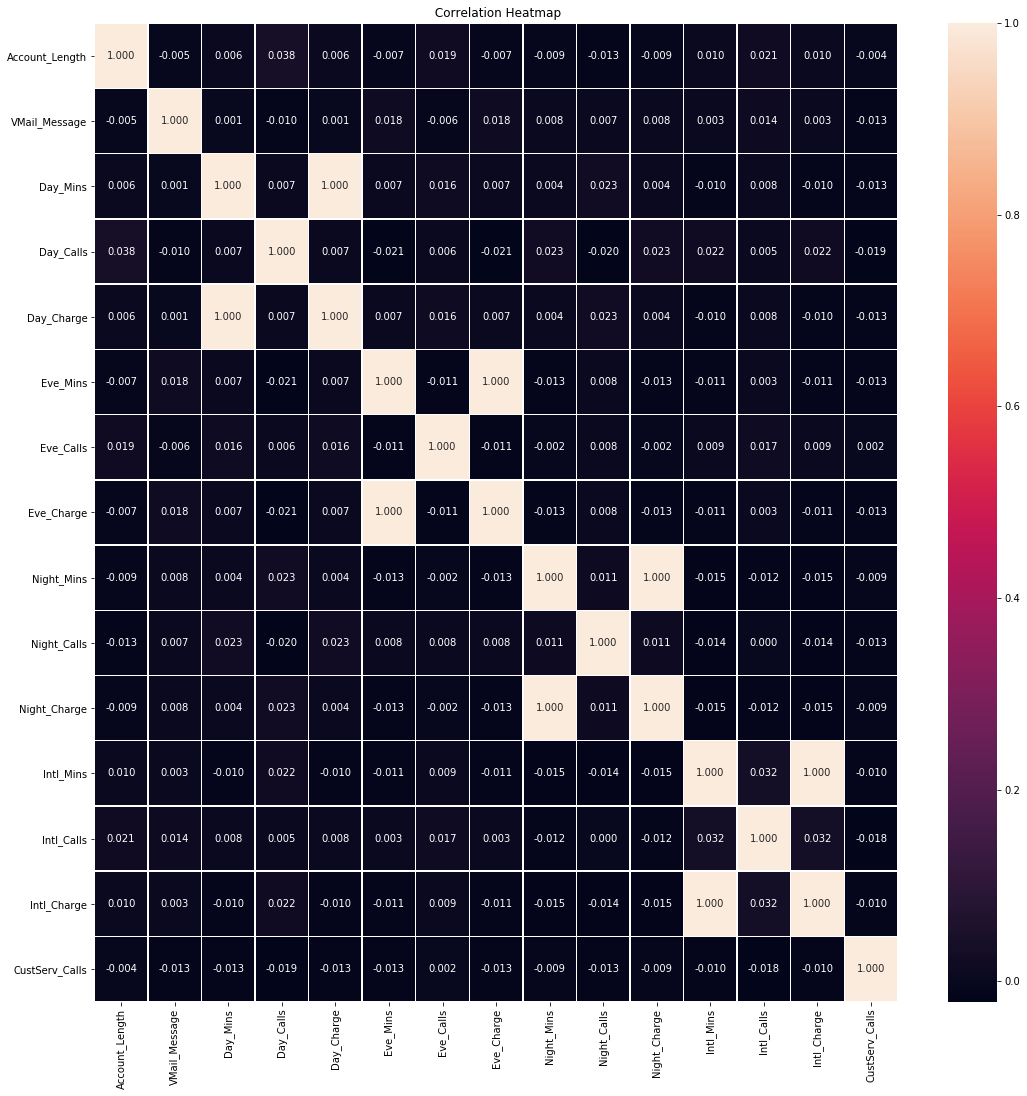

In [28]:
### Correlation plot
cor = number.corr()
f,ax = plt.subplots(figsize = (18,18))
plt.title(' Correlation Heatmap')
sns.heatmap(cor, annot = True, linewidths = .5, fmt='.3f', ax = ax)

In [29]:
### Number Dataset with Churn 
number2 = df[['Account_Length', 'VMail_Message', 'Day_Mins', 'Day_Calls',
       'Day_Charge', 'Eve_Mins', 'Eve_Calls', 'Eve_Charge', 'Night_Mins',
       'Night_Calls', 'Night_Charge', 'Intl_Mins', 'Intl_Calls', 'Intl_Charge',
       'CustServ_Calls', 'Churn?']]

### Scatterplots of Highly Correlated Variables 

After looking at the correlation plot, scatterplots of the variables that had a correlation of one with each other were created to see if the plots showed the high correlation. All four scatterplots show the high correlation and that as Mins go up so does the Charge. It is hard to see if there is any pattern when using Churn as the color of the points because all of the points are on top of each other in a straight line.

#### Days Mins vs. Day Charge

Text(0.5,1,'Day Charge vs. Day Mins')

<Figure size 720x576 with 0 Axes>

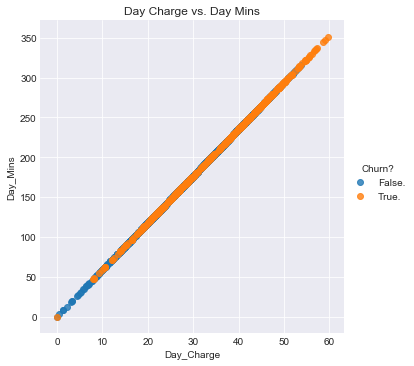

In [30]:
### Scatterplots
plt.figure(figsize=(10,8))
sns.set_style("darkgrid")
sns.lmplot(x="Day_Charge", y="Day_Mins", data=number2,fit_reg=False, hue = 'Churn?')
plt.title('Day Charge vs. Day Mins')

#### Eve Mins vs. Eve Charge

Text(0.5,1,'Eve Charge vs. Eve Mins')

<Figure size 720x576 with 0 Axes>

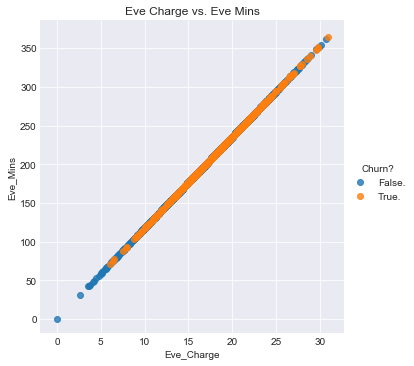

In [31]:
### Scatterplots
plt.figure(figsize=(10,8))
sns.set_style("darkgrid")
sns.lmplot(x="Eve_Charge", y="Eve_Mins", data=number2,fit_reg=False, hue = 'Churn?')
plt.title('Eve Charge vs. Eve Mins')

#### Night Mins vs. Night Charge

Text(0.5,1,'Night Charge vs. Night Mins')

<Figure size 720x576 with 0 Axes>

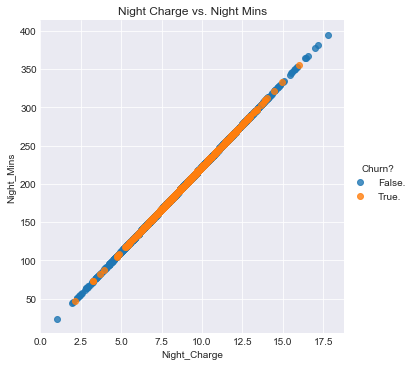

In [32]:
### Scatterplots
plt.figure(figsize=(10,8))
sns.set_style("darkgrid")
sns.lmplot(x="Night_Charge", y="Night_Mins", data=number2,fit_reg=False, hue = 'Churn?')
plt.title('Night Charge vs. Night Mins')

#### Intl Mins vs. Intl Charge

Text(0.5,1,'Intl Charge vs. Intl Mins')

<Figure size 720x576 with 0 Axes>

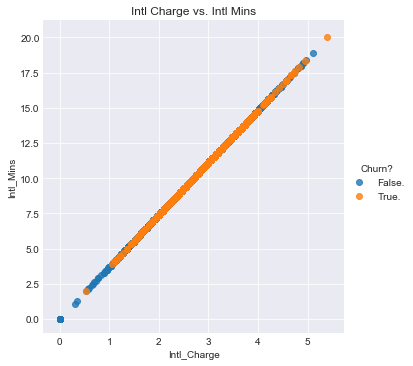

In [33]:
### Scatterplots
plt.figure(figsize=(10,8))
sns.set_style("darkgrid")
sns.lmplot(x="Intl_Charge", y="Intl_Mins", data=number2,fit_reg=False, hue = 'Churn?')
plt.title('Intl Charge vs. Intl Mins')

## Categorical Variables 
No analysis is done on phone because there are to many values to get ant thing from the varibale. 

### Categorical Tables 

#### State

Examining the State "Count Table" by Churn shows that there is a larger number of false than true when it comes to Churn in every state. The "Row Percentage Table" shows the same as the count table. False doesn’t go below 70% in any state.

In [34]:
print('Count Table')
print(pd.crosstab(factor['State'], factor['Churn?']))
print('-'*40)
print('Row Percentage Table')
print(pd.crosstab(factor['State'], factor['Churn?'],normalize='index'))

Count Table
Churn?  False.  True.
State                
AK          49      3
AL          72      8
AR          44     11
AZ          60      4
CA          25      9
CO          57      9
CT          62     12
DC          49      5
DE          52      9
FL          55      8
GA          46      8
HI          50      3
IA          41      3
ID          64      9
IL          53      5
IN          62      9
KS          57     13
KY          51      8
LA          47      4
MA          54     11
MD          53     17
ME          49     13
MI          57     16
MN          69     15
MO          56      7
MS          51     14
MT          54     14
NC          57     11
ND          56      6
NE          56      5
NH          47      9
NJ          50     18
NM          56      6
NV          52     14
NY          68     15
OH          68     10
OK          52      9
OR          67     11
PA          37      8
RI          59      6
SC          46     14
SD          52      8
TN          48      

#### Area.Code

 The Area.Code "Count Table" by Churn shows that there is a larger number of false than true Churn in all three of the area codes, with area code 415 having the most accounts. In the “Row Percentage Table” the breakdown is almost even across all three area codes with 86% false and 14% true for Churn.

In [35]:
print('Count Table')
print(pd.crosstab(factor['Area_Code'], factor['Churn?']))
print('-'*40)
print('Row Percentage Table')
print(pd.crosstab(factor['Area_Code'], factor['Churn?'],normalize='index'))

Count Table
Churn?     False.  True.
Area_Code               
408           716    122
415          1419    236
510           715    125
----------------------------------------
Row Percentage Table
Churn?       False.     True.
Area_Code                    
408        0.854415  0.145585
415        0.857402  0.142598
510        0.851190  0.148810


#### VMail_Plan

The Vmail.Plan "Count Table" by Churn shows that there is a larger number of false Churn and Vmail.Plan of no than any other option in the table. In the “Row Percentage Table" a Churn of false has a  much  larger percentage than a Churn that is true in both no and yes for Vmail.Plan.

In [36]:
print('Count Table')
print(pd.crosstab(factor['VMail_Plan'], factor['Churn?']))
print('-'*40)
print('Row Percentage Table')
print(pd.crosstab(factor['VMail_Plan'], factor['Churn?'],normalize='index'))

Count Table
Churn?      False.  True.
VMail_Plan               
no            2008    403
yes            842     80
----------------------------------------
Row Percentage Table
Churn?        False.     True.
VMail_Plan                    
no          0.832849  0.167151
yes         0.913232  0.086768


#### Intl_Plan

Examining the Intl.Plan "Count Table" by Churn shows that there is a larger number of false Churn and Intl.Plan of no than any other option in the table.  In the “Row Percentage Table" the breakdown shows that if an account has yes for Intl.Plan 42% are true and 57% are false when it comes to Churn. Which is much closer than accounts that are yes for Intl.Plan, where 88% are false and 11% are true when it comes to Churn.

In [37]:
print('Count Table')
print(pd.crosstab(factor['Intl_Plan'], factor['Churn?']))
print('-'*40)
print('Row Percentage Table')
print(pd.crosstab(factor['Intl_Plan'], factor['Churn?'],normalize='index'))

Count Table
Churn?     False.  True.
Intl_Plan               
no           2664    346
yes           186    137
----------------------------------------
Row Percentage Table
Churn?       False.     True.
Intl_Plan                    
no         0.885050  0.114950
yes        0.575851  0.424149


### Bar charts for factor variables 

Bar Charts were created to see the information in the tables created earlier in a graph. Two bar charts were created for the 4 categorical variables. The first chart is a count bar chart by Churn and the second is a stack percent bar chart by Churn. For state only a stacked percent bar chart was created because a count bar chart would have been a bad visual.

#### State

As seen from the tables already created and reinforced by the percent bar chart a false value is the dominating value for Churn in every state. There are some states like NJ, TX, and CA which get close to about 25% true but that is as close as any state gets.

Text(0,0.5,'%')

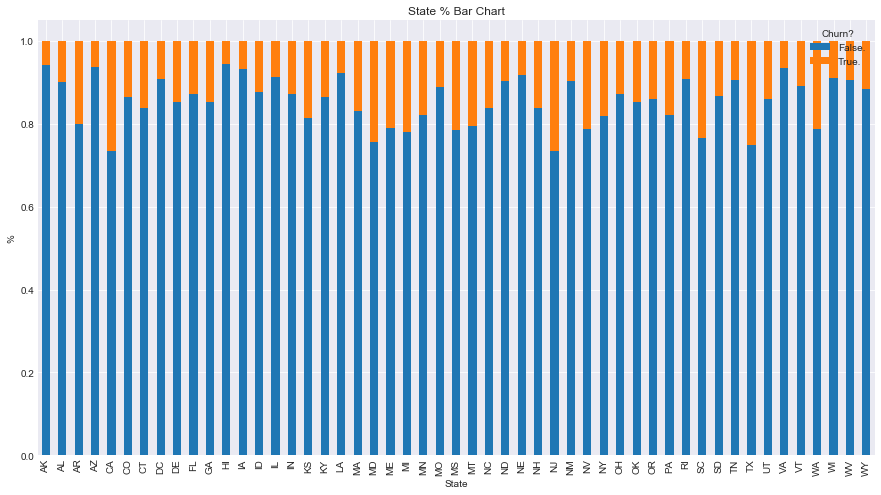

In [38]:
### % bar chart 
s = factor.groupby(['State', 'Churn?']).size().unstack('Churn?', fill_value=0)
s.head()
df_s = s[['False.', 'True.']] =s[['False.', 'True.']].apply(lambda x: x/x.sum(), axis=1)

plt.rcParams['figure.figsize'] = [15, 8]
df_s.plot(kind='bar', stacked = True, title = 'State % Bar Chart',)
plt.ylabel('%')

### Area.Code Stacked % Bar Chart


As seen in the “Row Percentage Table" earlier and reinforce by the percent bar chart the breakdown of Churn in each Area.Code is almost equal.

Text(0,0.5,'%')

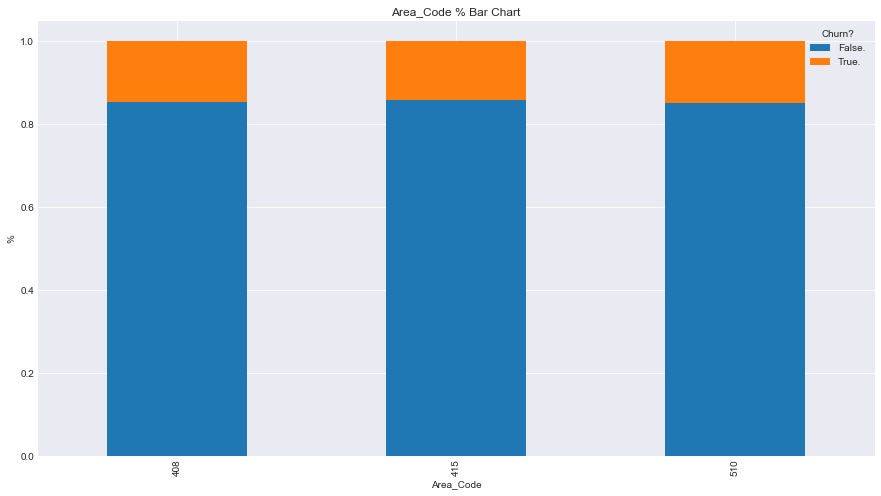

In [39]:
### % bar chart 
s = factor.groupby(['Area_Code', 'Churn?']).size().unstack('Churn?', fill_value=0)
s.head()
df_s = s[['False.', 'True.']] =s[['False.', 'True.']].apply(lambda x: x/x.sum(), axis=1)

plt.rcParams['figure.figsize'] = [15, 8]
df_s.plot(kind='bar', stacked = True, title = 'Area_Code % Bar Chart',)
plt.ylabel('%')

#### Area.Code Count Bar Chart

Examining the count bar chart for Area.Code the chart shows that a Churn of false is much larger than true for all three values of Area.Code and more accounts have Area.Code of 415 than any other.

Text(0.5,1,'Area_Code Count Bar Chart')

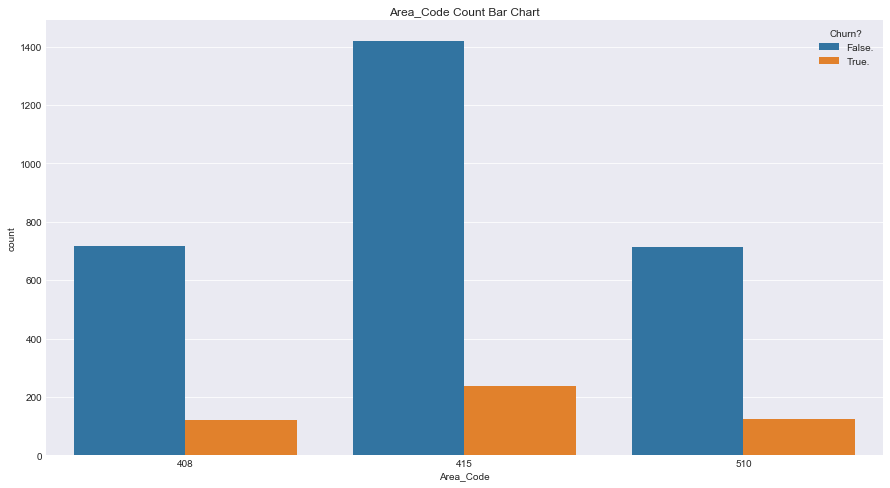

In [40]:
### count bar chart 
plt.figure(figsize=(15,8))
sns.countplot(data=factor, x = 'Area_Code', hue = 'Churn?')
plt.title('Area_Code Count Bar Chart')

#### Vmail Plan Stacked % Bar Chart


The percent bar chart shows that a larger percent of people have a true Churn when Vmail.Plan is no than yes. 

Text(0,0.5,'%')

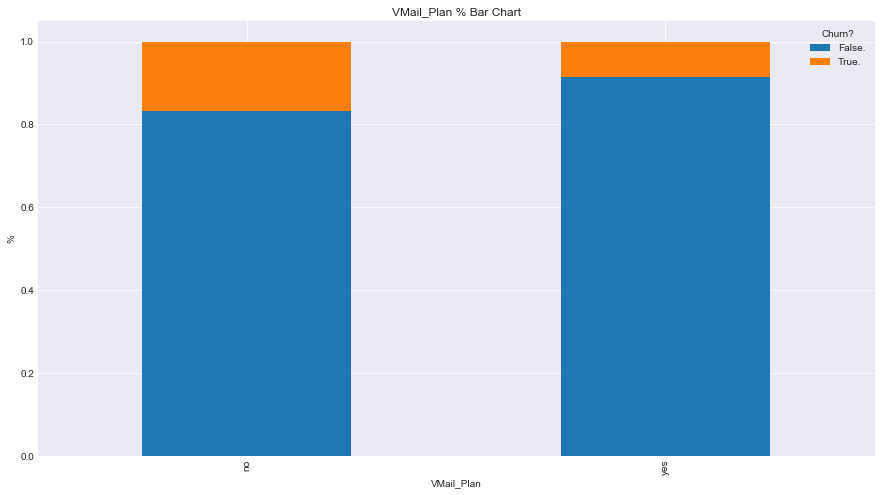

In [41]:
#### % bar chart 
s = factor.groupby(['VMail_Plan', 'Churn?']).size().unstack('Churn?', fill_value=0)
s.head()
df_s = s[['False.', 'True.']] =s[['False.', 'True.']].apply(lambda x: x/x.sum(), axis=1)

plt.rcParams['figure.figsize'] = [15, 8]
df_s.plot(kind='bar', stacked = True, title = 'VMail_Plan % Bar Chart',)
plt.ylabel('%')

#### Vmail Plan Count Bar Chart

When examining the count bar chart for Vmail.Plan the chart shows that a Churn of false is larger for both yes and no. Also, there are more accounts that are no Vmail.Plan than yes.

Text(0.5,1,'VMail_Plan Count Bar Chart')

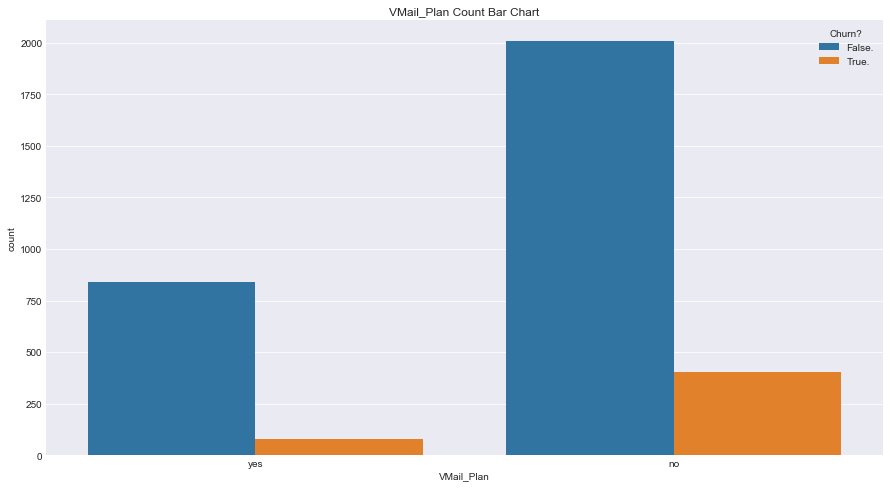

In [42]:
### count bar chart 
plt.figure(figsize=(15,8))
sns.countplot(data=factor, x = 'VMail_Plan', hue = 'Churn?')
plt.title('VMail_Plan Count Bar Chart')

### Intl Plan Stacked % Bar Chart

As seen in the “Row Percentage Table" earlier and reinforce by the percent bar chart the breakdown of Churn in Intl.Plan that are yes is very close. Unlike an Intl.Plan of no which is dominated by a Churn of false.

Text(0,0.5,'%')

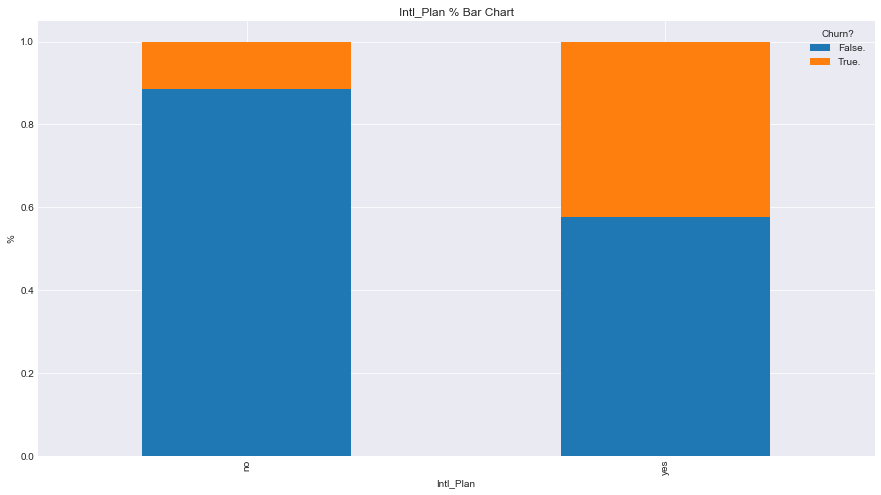

In [43]:
### % bar chart
s = factor.groupby(['Intl_Plan', 'Churn?']).size().unstack('Churn?', fill_value=0)
s.head()
df_s = s[['False.', 'True.']] =s[['False.', 'True.']].apply(lambda x: x/x.sum(), axis=1)

plt.rcParams['figure.figsize'] = [15, 8]
df_s.plot(kind='bar', stacked = True, title = 'Intl_Plan % Bar Chart',)
plt.ylabel('%')

#### Intl Plan Count Bar Chart

Examining the count bar chart for Intl.Plan  shows when Intl.Plan is yes the difference between a Churn of false and true is very small. False has a slightly bigger count than true. Also, the chart shows that a lot more accounts are no for Intl.Plan than yes.  

Text(0.5,1,'Intl_Plan Count Bar Chart')

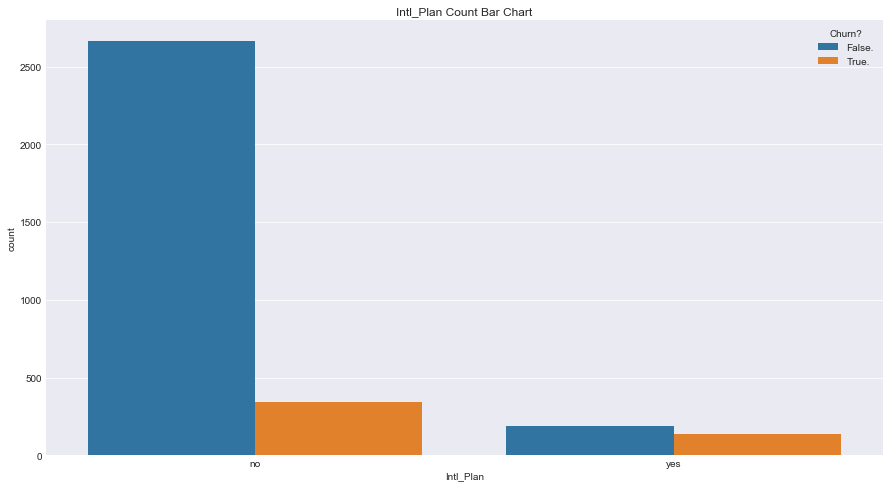

In [44]:
### count bar chart 
plt.figure(figsize=(15,8))
sns.countplot(data=factor, x = 'Intl_Plan', hue = 'Churn?')
plt.title('Intl_Plan Count Bar Chart')

# Conclusions

After loading the data and examining it the data was tested for NAs. There wasn’t any NA's in any of the columns. Then the data was split into two datasets by if it was a categorical or numeric variable. This was done to make it easier for exploratory data analysis.

The numeric variables were examined first. Summary statistics were completed to get a deeper understanding of the numeric variables in the dataset. The skewness of each variable was added to gain an understanding of the distribution of the variables. The skewness showed that Vmail.Message , Intl.Calls, and CustServ.Calls are skewed extremely positively.  

A function was created that showed the outliers using IQR, the skewness, a histogram, a boxplot, and a Q-Q plot. The histogram was created to see the distribution.  A boxplot was created to view the outliers. A Q-Q plot was created to see if the data is normally distributed. 

All of the numeric variables had outliers and the outliers were detected using the IQR method. Once detected the outliers could be droped, assign a new value, or try a transformation. 

The histograms and Q-Q plots were created to check the normality of the data. All of the variables were pretty normally distributed except for the three variables that were skewed extremely positively. A transformation was done to make the distribution of the data closer to normal for the three variables that were extremely positively skewed. Square Root transformation was done because all three variables have a lot of zeros in them. After the transformation the variables were much closer to normal and their skewness was closer to zero.

A correlation plot was created which showed that the correlations were mostly around zero except for Day.Mins and Day.Charge,  Eve.Mins and Eve.Charge, Night.Mins and Night.Charge, and Intl.Mins and Intl.Charge, which all have a correlation of one. It makes sense that as the number of minutes used rises the charge on the account should rise. Scatterplots of the variables that had a correlation of one with each other were created to see if the plots showed the high correlation. All four scatterplots show the high correlation. ‘

Next the categorical variables were examined, except for phone because there was to many values to gain any information from the variable. Two tables were created for the four variables State, Area.Code, Intl.Plan, and Vmail.Plan. For State the “Row Percentage Table” shows that in every state no lower than 70% of the accounts in that state have a Churn of false. The bar chart created shows the same results as the table.  Area.Code had three unique values and all three have the same percentage breakdown of 86% false and 14% true for Churn. The percent bar chart gave a great visual of this.  The tables for Intl.Plan showed that for accounts that are yes for Intl.Plan the difference between true and false for churn is much closer than any other variable. False is at 57% will true is 42%. That is the highest true percentage of any of the variables. Both bar chart gave a view of this information. The Vmail.Plan count table by Churn shows that there is a larger number of false Churn and Vmail.Plan of no than any other option in the table. The bar chart reinforces this information. 
